# Simulation of Transcription as Coin Toss
## Instructions
1. Work on a copy of this notebook: _File_ > _Save a copy in Drive_ (you will need a Google account). Alternatively, you can download the notebook using _File_ > _Download .ipynb_, then upload it to [Colab](https://colab.research.google.com/).

2. Execute the following cell (click on it and press Ctrl+Enter) to install Julia, IJulia and other packages (if needed, update `JULIA_VERSION` and the other parameters). This takes a couple of minutes.

3. Reload this page (press Ctrl+R, or ⌘+R, or the F5 key) and continue to the next section.

_Notes_:
* If your Colab Runtime gets reset (e.g., due to inactivity), repeat steps 2, and 3.


In [ ]:
# For Instalations

%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.11.1" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia Random Plots Statistics Distributions"
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

Installing Julia 1.11.1 on the current Colab Runtime...
2024-11-26 14:45:44 URL:https://storage.googleapis.com/julialang2/bin/linux/x64/1.11/julia-1.11.1-linux-x86_64.tar.gz [254553793/254553793] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
Installing Julia package Random...
Installing Julia package Plots...
Installing Julia package Statistics...
Installing Julia package Distributions...
Installing IJulia kernel...
[ Info: Installing julia kernelspec in /root/.local/share/jupyter/kernels/julia-1.11

Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then
jump to the 'Checking the Installation' section.


# Checking the Installation
The `versioninfo()` function should print your Julia version and some other info about the system:

In [1]:
versioninfo()

Julia Version 1.11.1
Commit 8f5b7ca12ad (2024-10-16 10:53 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 2 × Intel(R) Xeon(R) CPU @ 2.20GHz
  WORD_SIZE: 64
  LLVM: libLLVM-16.0.6 (ORCJIT, broadwell)
Threads: 2 default, 0 interactive, 1 GC (on 2 virtual cores)
Environment:
  LD_LIBRARY_PATH = /usr/local/nvidia/lib:/usr/local/nvidia/lib64
  JULIA_NUM_THREADS = 2


# Simulate coin toss

In [2]:
using Random

In [3]:
# Number of coin toss
N = 10

# Probability of head
p = 0.7

# Number of repeats of the experiment
T = 10

10

In [4]:
# count of Heads in N coin tosses
H_count = 0

# The sequence of Head and Tail
toss_result = String[]

# Generate uniformly distributed random numbers
U = rand(N)

# loop over N coin tosses
for j in 1:N

    # decide H or T
    if U[j] <= p
        # It is a Head
        H_count = H_count + 1
        push!(toss_result, "H")
    else
        push!(toss_result, "T")
    end
end

println("The result of ", N, " coin tosses: ", join(toss_result, " "))
println("Number of Heads: ", H_count)


The result of 10 coin tosses: H H T H H T T T H H
Number of Heads: 6


## -------------------------------------------------------------------

# Simulate transcription as coin toss

Rate of transcription, lambda = 2

Total time, T = 10

Therefore, the average number of mRNA produced in time T,

mu = lambda*T = 20

Let's divide the total time in 1000 time steps. So, number of time steps, N = 1000.

Following binomial distribution, mu = p* N, here p is the probability of production of one mRNA at a particular interval

So, p = mu/N = 20/1000 = 0.02

In [5]:
# Inputs for simulation

# Number of time steps
time_steps = 1000

# Probability of head
p = 0.02

# Initial number of mRNA
m0 = 0

# Number of repeats of the experiment
N = 1000

1000

In [6]:
# Get required packages
using Random
using Plots
using Statistics

In [7]:
# This function simulate transcrition as seriese of coin tosses
# Inputs:
# time_steps: Number of discrete time points
# p: probability of having a mRNA at a time point

function transcription_toss(time_steps, p, m0)

    # Do T coin tosses with probability p
    # Store the cumulative count
    num_mRNA_cumulative = cumsum(rand(time_steps) .<= p)

    # Prepend the initial count m0
    return [m0; num_mRNA_cumulative .+ m0]
end

transcription_toss (generic function with 1 method)

In [8]:
# perform one simulation
mRNA_count = transcription_toss(time_steps,p, m0)

# Print result
println("Number of mRNA produced = ", mRNA_count[end])

Number of mRNA produced = 18


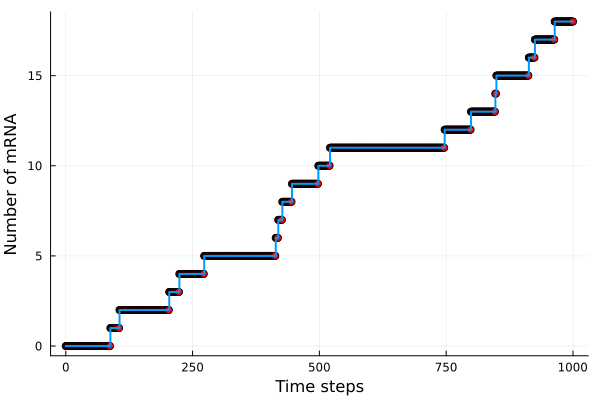

In [9]:
# Plot the data
plot(0:time_steps, mRNA_count,
    xlabel="Time steps", ylabel="Number of mRNA",
    scatter=:auto, marker=:circle, markercolor=:red,
    lw=2, line=:steppost,
    legend=:none)

In [10]:
# Perform multiple repeats of the simulation

# Data holder
data = zeros(time_steps + 1, N)

# Do simulations
for j in 1:N
    data[:,j] = transcription_toss(time_steps,p, m0)
end

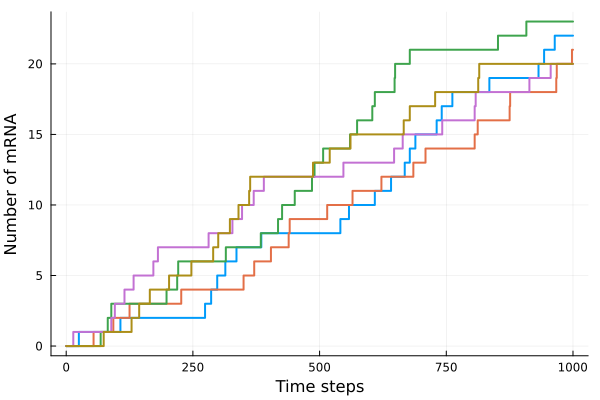

In [11]:
# Plot result few independent runs

plot(0:time_steps, data[:, 1:5],
    xlabel="Time steps", ylabel="Number of mRNA",
    lw=2, line=:steppost,
    legend=:none)

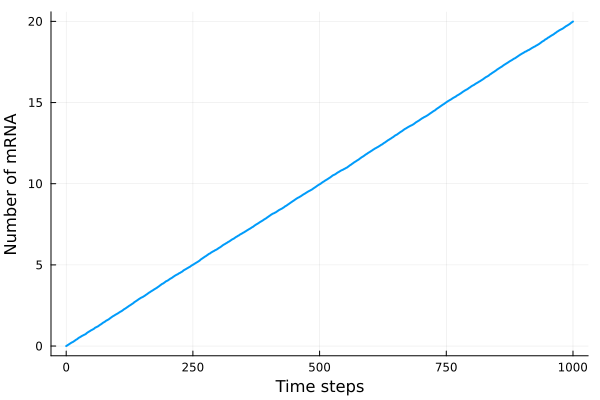

In [12]:
# Plot the average of multiple simulations

# Get the row average of the data matrix
avg_data = mean(data, dims = 2)

# Plot the average data
plot(0:time_steps, avg_data,
    xlabel="Time steps", ylabel="Number of mRNA",
    lw=2,
    legend=:none)

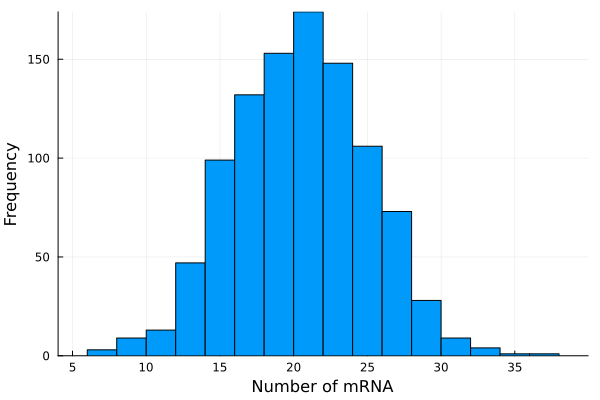

In [13]:
# Plot histogram to show distribution of mRNA in cells at the end

# Extract the last row
final_mRNA = data[end, :]

# Plot the histogram
histogram(final_mRNA, bins=20,  xlabel="Number of mRNA", ylabel="Frequency", legend=:none)

## -----------------------------------------------------------------------

# Simulate transcription as a Poisson process

Rate of transcription, lambda = 2

Total time, T = 10



In [14]:
# Inputs for simulations

# Rate of transcription
lambda = 2.0

# Total time
T = 10.0

# Initial number of mRNA
mRNA_0 = 0

# Total number of independent simulations
N = 1000

1000

In [15]:
# Call the packages
using Distributions
using Plots

In [16]:
# Function to simulate a Poisson process

# Inputs:
# lambda: Rate of the process. Float64
# T: Total time for simulation. Float64
# x0: Initial count. Int

# Outputs:
# event_times: A vector listing time points of events
# event_counts: A vector listing cumulative count of events for each time point in event_times

function simulate_poisson(lambda::Float64, T::Float64, x0::Int)
    event_times = [0.0]   # To store the time of each event
    event_counts = [x0]      # To store the cumulative event count
    current_time = 0.0
    count = x0

    while current_time < T
        # Generate inter-arrival time from an exponential distribution
        inter_event_time = rand(Exponential(1 / lambda))

        # Update clock
        current_time += inter_event_time

        # Check if current_time is still within the desired time limit
        if current_time <= T
            count += 1                     # Increment the count of events
            push!(event_times, current_time)  # Record the time of the event
            push!(event_counts, count)      # Record the cumulative count
        end
    end

    return event_times, event_counts
end

simulate_poisson (generic function with 1 method)

In [17]:
# Do one simulation
t, mRNA_count = simulate_poisson(lambda, T, mRNA_0);


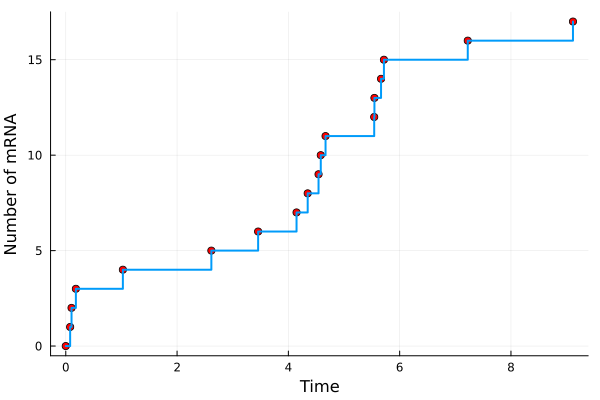

In [18]:
#Plot the data
plot(t, mRNA_count,
    xlabel="Time", ylabel="Number of mRNA",
    scatter=:auto, marker=:circle, markercolor=:red,
    lw=2, line=:steppost,
    legend=:none)


In [19]:
# Function to bin simulation data

# Inputs:
# time_data: A vector with event times. Float64
# count_data: A vector listing cumlative counts at time points in time_data. Int
# init_count: Initial count. Int
# total_T: Total time of simulation. Float64
# dt: Small interval for binning the data. Float64

#Outputs:
# time_bins: A vector with total time divided at small equal intervals. Float64
# binned_data: Vector for binned data as per the time_bins. Int

function data_binning(time_data::Vector{Float64}, count_data::Vector{Int}, init_count::Int, total_T::Float64, dt::Float64)
    time_bins = 0.0:dt:total_T
    binned_data = zeros(length(time_bins))
    binned_data[1] = init_count

    for j in 2:length(time_bins)
        idx = findlast(x -> x <= time_bins[j], time_data)
        binned_data[j] = count_data[idx]
    end

    return time_bins, binned_data
end


data_binning (generic function with 1 method)

In [20]:
# Doing multiple simulations

# Small time interval used for binning of data
dt = 0.1

# Creat time bins, vector to store average data
time_bins = 0.0:dt:T
avg_data = zeros(Float64, length(time_bins))
all_binned_data = zeros(Float64, length(time_bins), N)

# Do the independent simulations one-by-one
for j in 1:N

    # Simulate
    t, mRNA_count = simulate_poisson(lambda, T, mRNA_0)

    # Bin the data
    time_bins, binned_data = data_binning(t, mRNA_count, mRNA_0, T, dt)

    # Add to avg data
    avg_data += binned_data

    all_binned_data[:,j] = binned_data

end

# Average the data
avg_data = sum(all_binned_data, dims=2) ./ N;



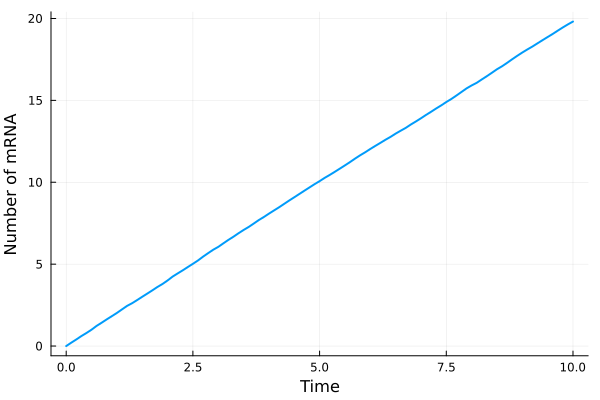

In [21]:

#Plot the average data
plot(time_bins, avg_data,
    xlabel="Time", ylabel="Number of mRNA",
    lw=2,
    legend=:none)


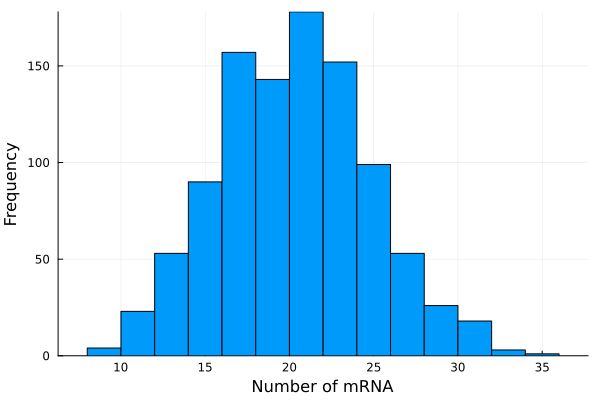

In [22]:
# Plot histogram to show distribution of mRNA in cells at the end

# Extract the last row
final_mRNA = all_binned_data[end, :]

# Plot the histogram
histogram(final_mRNA, bins=20,  xlabel="Number of mRNA", ylabel="Frequency", legend=:none)
